In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly
%matplotlib inline

In [0]:
url="https://raw.githubusercontent.com/Nimishkhurana/Linear-Regression/master/housingdata.csv"
df=pd.read_csv(url)

In [0]:
df


,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
6,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
7,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
8,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
9,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0


In [0]:
df.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [0]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = housing_colnames
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [0]:
df['MEDV'].head()

0    21.6
1    34.7
2    33.4
3    36.2
4    28.7
Name: MEDV, dtype: float64

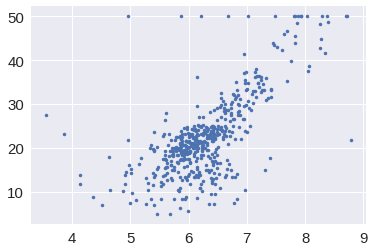

In [0]:
plt.plot(df['RM'],df['MEDV'],marker='.',linestyle='none')

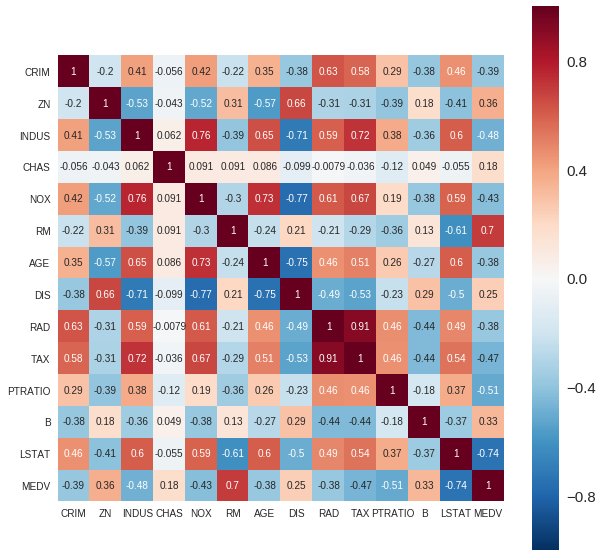

In [0]:

fig=plt.subplots(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()


In [0]:
np.dot(df['MEDV'],df['RM'])

73766.27759999997

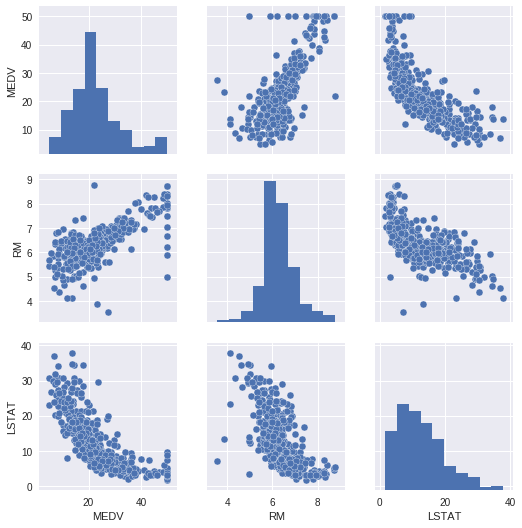

In [0]:
x=df[['MEDV','RM','LSTAT']]
sns.pairplot(x,x_vars=['MEDV','RM','LSTAT'],y_vars=['MEDV','RM','LSTAT'])

In [0]:
X=df[['RM','LSTAT']]#'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]

In [0]:

X


,RM,LSTAT
0,6.421,9.14
1,7.185,4.03
2,6.998,2.94
3,7.147,5.33
4,6.430,5.21
5,6.012,12.43
6,6.172,19.15
7,5.631,29.93
8,6.004,17.10
9,6.377,20.45


In [0]:
y=df[["MEDV"]]

In [0]:

y.columns=['Target']
y.columns
y


,Target
0,21.6
1,34.7
2,33.4
3,36.2
4,28.7
5,22.9
6,27.1
7,16.5
8,18.9
9,15.0


In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)
print("Root Mean Square Error : {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
print("R2 square : {}".format((r2_score(y_test,y_pred))))
#sns.regplot(x_test,y_pred,data=)
# plt.scatter(x_test,y_test)
# plt.plot(x_test,y_pred,color="black",linewidth=3)
# plt.xticks(())
# plt.yticks(())

Root Mean Square Error : 4.942608292566839
R2 square : 0.687788785608628


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



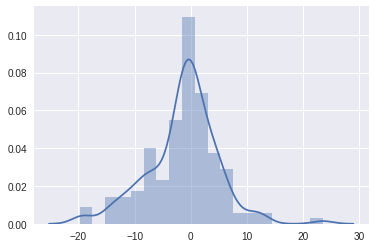

In [0]:
sns.distplot(y_test-y_pred)

In [0]:
def create_polynomial(degree):
  poly=PolynomialFeatures(degree=degree)
  x_train_poly= poly.fit_transform(x_train)
  poly_model=linear_model.LinearRegression()
  poly_model.fit(x_train_poly,y_train)
  y_train_pred=poly_model.predict(x_train_poly)
  y_test_pred=poly_model.predict(poly.fit_transform(x_test))
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
  r2_train = r2_score(y_train, y_train_pred)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
  r2_test = r2_score(y_test, y_test_pred)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [0]:
create_polynomial(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.927019767188339
R2 score of training set is 0.7219352060654847


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.4811557786316984
R2 score of test set is 0.8451243908295606
